# <a id='toc1_'></a>[Проект: Анализ оттока клиентов банка](#toc0_)

## <a id='toc1_1_'></a>[Описание проекта:](#toc0_)
Банк предоставил данные о клиентах, включая их демографические характеристики, финансовые показатели, активность и использование банковских продуктов. Анализ этих данных позволил выявить ключевые факторы, влияющие на отток клиентов, и сформулировать рекомендации для снижения уровня ухода клиентов и повышения их лояльности.

## <a id='toc1_2_'></a>[Цель исследования:](#toc0_)
Определить основные причины оттока клиентов, выявить закономерности в поведении ушедших клиентов и разработать рекомендации для их удержания.

Источник данных: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download

---

## <a id='toc1_3_'></a>[Вопросы:](#toc0_)
1. **Распределение клиентов:**
   - Как распределены клиенты по странам, полу и возрасту?
   - Сколько клиентов ушло и осталось?

2. **Финансовые показатели:**
   - Как баланс на счете связан с оттоком? Есть ли разница в балансах между ушедшими и оставшимися клиентами?
   - Влияет ли кредитный рейтинг на вероятность оттока?
   - Есть ли связь между зарплатой и оттоком?

3. **Продукты и активность:**
   - Как количество продуктов влияет на отток?
   - Чаще ли уходят клиенты без кредитной карты?
   - Как активность клиента связана с оттоком?

4. **Демография и поведение:**
   - Есть ли зависимость между возрастом и оттоком?
   - Как срок сотрудничества с банком влияет на вероятность ухода?

5. **Корреляции и взаимодействия:**
   - Есть ли связь между страной и оттоком?
   - Какие признаки наиболее сильно коррелируют с оттоком?

6. **Корреляция сложных признаков с оттоком клиентов:**
   - Подобрать сложные признаки (отношения признаков) и изучить их корреляцию с оттоком клиентов.

---
## <a id='toc1_4_'></a>[Поля данных:](#toc0_)

`customer_id` - уникальный идентификатор клиента в системе банка.

`credit_score` - кредитный рейтинг, отражающий кредитоспособность клиента.

`country` - страна проживания клиента.

`gender` - пол клиента.

`age` - возраст клиента.

`tenure` - количество лет, в течение которых клиент пользуется услугами банка.

`balance`  - сумма денег на счете клиента.

`products_number` - количество банковских продуктов, которыми пользуется клиент.

`credit_card` - Наличие кредитной карты. Бинарный признак: 1 — у клиента есть кредитная карта, 0 — нет.

`active_member` - активный клиент. Бинарный признак: 1 — клиент активно пользуется услугами банка, 0 — неактивен.

`estimated_salary` - оценка годового дохода клиента.

`churn` - Целевая переменная: 1 — клиент ушел из банка, 0 — клиент остался.

# Содержание:<a id='toc0_'></a>
- [Проект: Анализ оттока клиентов банка](#toc1_)    
  - [Описание проекта:](#toc1_1_)    
  - [Цель исследования:](#toc1_2_)    
  - [Вопросы](#toc1_3_)
  - [Поля данных](#toc1_4_)
- [Обзор таблиц](#toc2_)    
- [Предобработка данных](#toc3_)    
- [Исследование клиентов банка (EDA)](#toc4_)    
  - [Распределения клиентов](#toc4_1_)    
  - [Финансовые показатели](#toc4_2_)    
  - [Продукты и активность](#toc4_3_)    
  - [Демография и поведение](#toc4_4_)    
  - [Корреляции и взаимодействия](#toc4_5_)    
  - [Корреляция сложных признаков с оттоком клиентов](#toc4_6_)    
    - [Отношение возраста клиента к его балансу на счёте](#toc4_6_1_)
    - [Отношение возраста клиента к сроку сотрудничества с банком](#toc4_6_2_)
    - [Отношение баланса на счёте к предполагаемой зарплате](#toc4_6_3_)
    - [Отношение кредитного рейтинга к балансу на счете](#toc4_6_4_)
    - [Отношение предполагаемой зарплаты к возрасту клиента](#toc4_6_5_)
    - [Отношение кредитного рейтинга к предполагаемой зарплате](#toc4_6_6_)
- [Вывод](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Импортируем библиотеки:

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio

# Рендерер по умолчанию статический
pio.renderers.default = "png"

Чтение данных и определение функции для диагностики df:

In [133]:
# чтение
data = pd.read_csv('data\\bank_customer.csv', sep =',')

# определение функции
def df_diagnostics(df1):
    # основные характеристики столбцов
    diag = pd.DataFrame({
        'dtypes': df1.dtypes,
        'count': df1.count(),
        'unique': df1.nunique(),
        'nan_count': df1.isnull().sum(),
        'nan_%': df1.isnull().sum() / df1.shape[0] * 100})

    metrics = {
        'mean': lambda s: s.mean(),
        'median': lambda s: s.median(),
        'min': lambda s: s.min(),
        'max': lambda s: s.max()}

    # метрики только для числовых столбцов
    numeric_cols = df1.select_dtypes(include=[np.number]).columns
    for metric, func in metrics.items():
        diag[metric] = [func(df1[col]) if col in numeric_cols else np.nan
                        for col in df1.columns]

    # количество дублирующих строк в df
    duplicates_count = df1.duplicated().sum()
    print("Количество дублирующих строк:", duplicates_count)

    # df с градиентной подсветкой, форматированием и округлением чисел
    return (diag.style.background_gradient(cmap='Set3', low=0.1, high=0.01)
            .format("{:.2f}", subset=diag.select_dtypes(include=[np.number]).columns))

---
# <a id='toc2_'></a>[Обзор таблиц](#toc0_)


In [134]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Информация о таблице:

In [135]:
df_diagnostics(data)

Количество дублирующих строк: 0


,dtypes,count,unique,nan_count,nan_%,mean,median,min,max
customer_id,int64,10000.00,10000.00,0.00,0.00,15690940.57,15690738.00,15565701.00,15815690.00
credit_score,int64,10000.00,460.00,0.00,0.00,650.53,652.00,350.00,850.00
country,object,10000.00,3.00,0.00,0.00,nan,nan,nan,nan
gender,object,10000.00,2.00,0.00,0.00,nan,nan,nan,nan
age,int64,10000.00,70.00,0.00,0.00,38.92,37.00,18.00,92.00
tenure,int64,10000.00,11.00,0.00,0.00,5.01,5.00,0.00,10.00
balance,float64,10000.00,6382.00,0.00,0.00,76485.89,97198.54,0.00,250898.09
products_number,int64,10000.00,4.00,0.00,0.00,1.53,1.00,1.00,4.00
credit_card,int64,10000.00,2.00,0.00,0.00,0.71,1.00,0.00,1.00
active_member,int64,10000.00,2.00,0.00,0.00,0.52,1.00,0.00,1.00


Анализ информации о таблице показал, что:
- клиенты банка по полю `customer_id` все уникальные
- имена полей корректные
- типы данных в полях корректны
- в каждом поле по 10 000 значений, пропусков нет

Построим гистограммы распределений всех числовых полей:

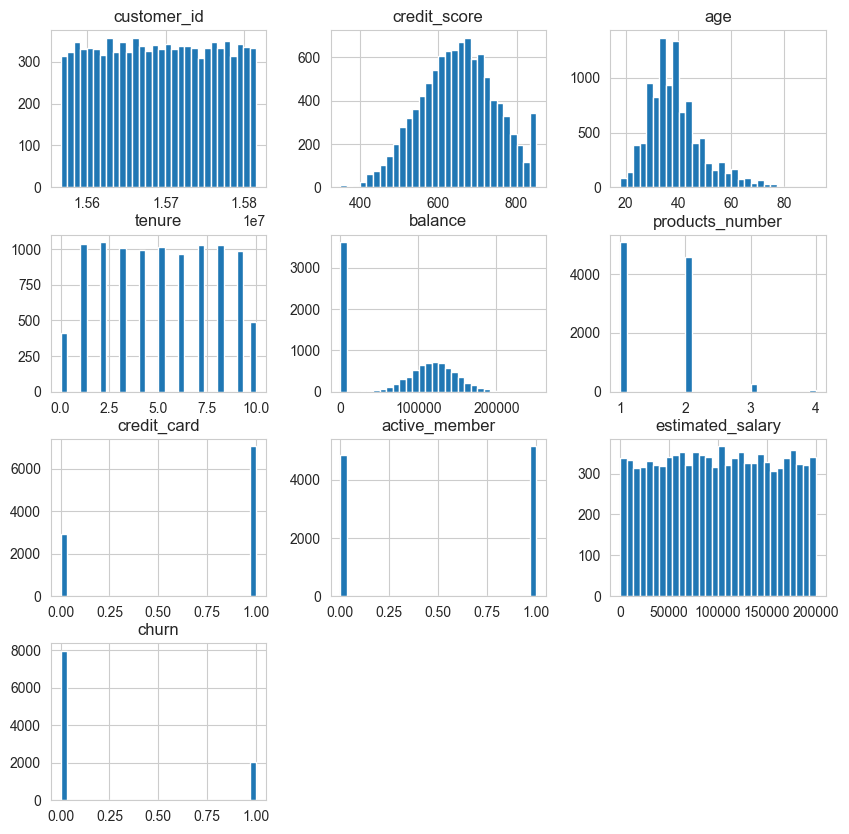

In [136]:
data.hist(bins=30, figsize=(10, 10))
plt.show()

---
# <a id='toc3_'></a>[Предобработка данных](#toc0_)

Для удобства дальнейшего анализа произведём следующие замены:
- для следующих полей с бинарным типом данных создадим доп поля с заменой значений 1 на "да" и 0 на "нет": credit_card, active_member, churn.
- в поле "gender" заменим "Male" на "Мужчины" и "Female" на "Женщины".
- переименуем названия стран.

In [137]:
# создаём одноимённое поле для поля credit_card
data['credit_card_str'] = data['credit_card'].replace({1: 'Да', 0: 'Нет'})

# создаём одноимённое поле для поля active_member
data['active_member_str'] = data['active_member'].replace({1: 'Да', 0: 'Нет'})

# создаём одноимённое поле для поля churn
data['churn_str'] = data['churn'].replace({1: 'Да', 0: 'Нет'})

# создаём одноимённое поле для поля gender
data['gender_str'] = data['gender'].replace({'Male': 'Мужчины', 'Female': 'Женщины'})

# создаём одноимённое поле для поля country
data['country_str'] = data['country'].replace({'France': 'Франция', 'Germany': 'Германия', 'Spain': 'Испания'})

`Вывод:` В процессе предобработки данных и для удобства дальнейшего анализа созданы одноимённые поля, в которых преобразованы значения:
- для полей credit_card, active_member, churn значения 1 заменены на "да" и значения 0 на "нет".
- для поля gender заменены значения: "Male" на "Мужчины" и "Female" на "Женщины".
- для поля country заменены значения: 'France': 'Франция', 'Germany': 'Германия', 'Spain': 'Испания'.

---
# <a id='toc4_'></a>[Исследование клиентов банка (EDA)](#toc0_)

Определим функции для построения графиков:

In [138]:
def plot_histplot(data, column, column_label, title, xlabel, ylabel,
                  group_by=None, group_label=None, height_ratios=(0.2, 0.8)):
    """Построение гистограмм распределения"""
    # Расчет и вывод квартилей
    if group_by is not None:
        q_quant = (data.groupby(group_by)[column]
                   .quantile([0.25, 0.5, 0.75])
                   .round().astype(int))
        print(f"Квартили '{column_label}' по оттоку клиентов:")
        print(q_quant.unstack())
    else:
        q = data[column].quantile([0.25, 0.5, 0.75]).round().astype(int)
        print(f"1-квартиль: {q[0.25]}, 2-квартиль: {q[0.5]}, 3-квартиль: {q[0.75]}")

    # Создание композитного графика
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(6, 4),
                           gridspec_kw={"height_ratios": height_ratios})
    # Построение boxplot
    if group_by is not None:
        sns.boxplot(data=data, x=column, y=group_by, orient='h', ax=ax_box)
    else:
        sns.boxplot(data[column], orient='h', ax=ax_box)
    ax_box.set(xlabel='', ylabel='')

    # Построение гистограммы
    if group_by is not None:
        hist = sns.histplot(data=data, x=column, hue=group_by, ax=ax_hist,
                            element='step', stat='count', multiple='layer', alpha=0.5)
        hist.legend_.set_title(group_label)
    else:
        sns.histplot(data=data, x=column, ax=ax_hist)

    # Настройка оформления
    if group_by is not None:
        ax_box.set_title(title)
    else:
        ax_hist.set_title(title)
    ax_hist.set_xlabel(xlabel)
    ax_hist.set_ylabel(ylabel)
    plt.tight_layout()

def plot_barplot(data, column, title, xlabel, ylabel="Количество клиентов",
                 figsize=(6, 4), legend_title="Клиент ушёл?"):
    # Группировка данных и подсчет частот
    count_data = (data.groupby([column, "churn_str"]).size()
                  .reset_index(name="count")
                  .sort_values([column, "churn_str"]))

    # Расчет общего количества для каждой категории
    total = count_data.groupby(column)["count"].sum().to_dict()

    # Определение порядка категорий
    unique_categories = count_data[column].unique()

    # Создание графиков
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=column, y="count", hue="churn_str", data=count_data,
                     order=unique_categories)

    # Добавление аннотаций с процентами
    for container in ax.containers:
        labels = [f"{int(b.get_height())} ({b.get_height()/total[p]:.0%})"
                  for b, p in zip(container, unique_categories)]
        ax.bar_label(container, labels=labels)

    # Оформление графика
    plt.title(title)
    plt.legend(title=legend_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()

Определим функцию для выделения данных в df:

In [139]:
def highlight_heatmap(data, col_heatmap=None, cmap='RdYlGn', decimal_places=2):
    """Наложение тепловой карты с округлением значений на указанные столбцы.

    :param data: Исходные данные (DataFrame или Series)
    :param col_heatmap: Список столбцов для тепловой карты
    :param cmap: Цветовая палитра
    :param decimal_places: Количество знаков после запятой
    :return: Стилизованный DataFrame
    """
    if isinstance(data, pd.Series):
        data = data.to_frame()

    styled_df = data.style

    if col_heatmap:
        # Форматирование чисел перед применением стилей
        format_str = f"{{:.{decimal_places}f}}"
        styled_df = styled_df.format(format_str, subset=col_heatmap)

        # Применение тепловой карты
        for col in col_heatmap:
            styled_df = styled_df.background_gradient(
                subset=[col], cmap=cmap)

    return styled_df

## <a id='toc4_1_'></a>[Распределения клиентов](#toc0_)

Изучим как клиенты распределены по странам:

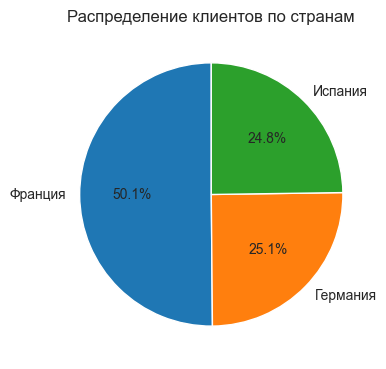

In [140]:
# Подсчитываем количество наблюдений по странам
counts = data['country_str'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(4, 4))
plt.pie(counts,labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение клиентов по странам')
plt.tight_layout()

`Вывод:` 50.1% клиентов банка из Франции, 25.1% из Германии и 24.8% из Испании.

Изучим как клиенты распределены по полу:

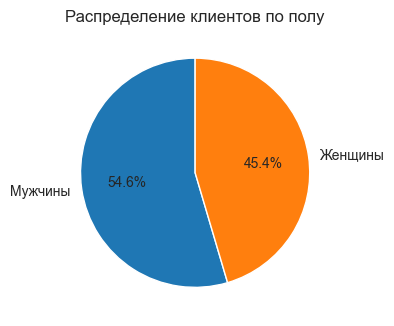

In [141]:
# Подсчитываем количество наблюдений по полу
counts = data['gender_str'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(4, 4))
plt.pie(counts,labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение клиентов по полу')
plt.tight_layout()

`Вывод:` 54.6% клиентов это мужчины и 45.4% это женщины.

Изучим как клиенты распределены по возрасту:

1-квартиль: 32, 2-квартиль: 37, 3-квартиль: 44


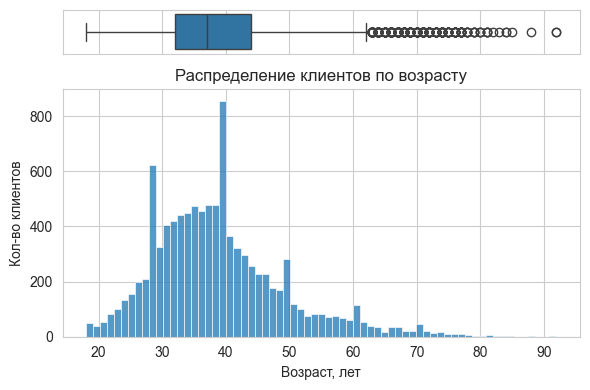

In [142]:
plot_histplot(data=data, column='age', column_label='возраст', group_by=None,
              title='Распределение клиентов по возрасту',
              xlabel='Возраст, лет', ylabel= 'Кол-во клиентов',
              height_ratios=(0.15, 0.85))

`Вывод:` Медианный возраст клиентов 37 лет и 50% клиентов распределено в возрасте от 32 до 44 лет. Стоит сегментировать клиентов по возрасту и разработать под каждый сегмент своё предложение.

Изучим сколько клиентов банка ушло и сколько ещё пользуется услугами банка:

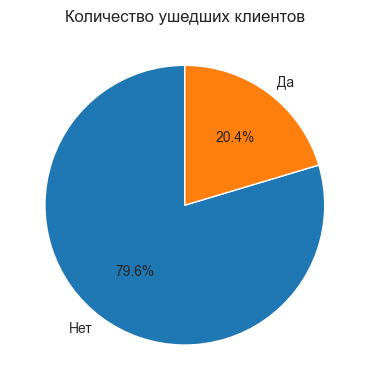

In [143]:
# Подсчитываем количество ушедших и нет клиентов
counts = data['churn_str'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(4, 4))
plt.pie(counts,labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Количество ушедших клиентов')
plt.tight_layout()

`Вывод:` Из 100% клиентов, которые были когда-либо с банком 20.4% перестали пользоваться услугами банка. Значимый процент клиентов перестали пользоваться услугами банков. Необходимо разрабатывать меры по удержанию клиентов.

---
## <a id='toc4_2_'></a>[Финансовые показатели](#toc0_)

Изучим как баланс на счёте связан с оттоком. Есть ли разница в балансах между ушедшими и оставшимися клиентами?

Квартили 'баланс на счёте' по оттоку клиентов:
            0.25    0.50    0.75
churn_str                       
Да         38340  109349  131433
Нет            0   92073  126410


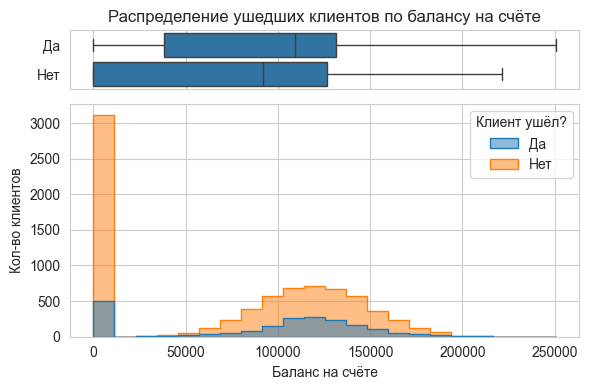

In [144]:
plot_histplot(data=data, column='balance', column_label='баланс на счёте',
              title='Распределение ушедших клиентов по балансу на счёте',
              xlabel='Баланс на счёте', ylabel='Кол-во клиентов',
              group_by='churn_str', group_label='Клиент ушёл?')

`Вывод:` Баланс на счетах действующих и ушедших клиентов распределен примерно равномерно. Медианный баланс действующих клиентов 92073 и ушедших 109349. В среднем клиенты с большим балансом уходят чаще. Необходимо разработать комплекс мер для удержания более состоятельных клиентов.

Изучим как кредитный рейтинг связан с вероятностью оттока клиентов:

Квартили 'кредитный рейтинг' по оттоку клиентов:
           0.25  0.50  0.75
churn_str                  
Да          578   646   716
Нет         585   653   718


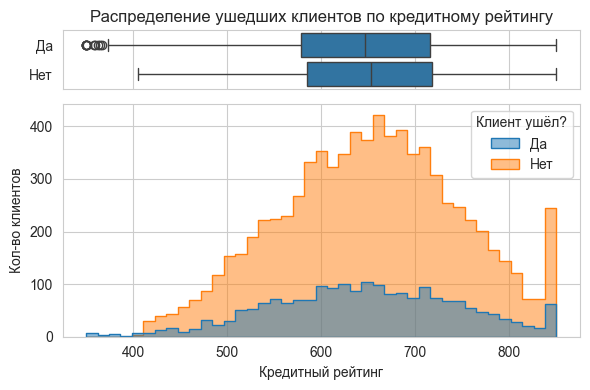

In [145]:
plot_histplot(data=data, column='credit_score', column_label='кредитный рейтинг',
              title='Распределение ушедших клиентов по кредитному рейтингу',
              xlabel='Кредитный рейтинг', ylabel='Кол-во клиентов',
              group_by='churn_str', group_label='Клиент ушёл?')

`Вывод:` Ушедшие клиенты по кредитному рейтингу распределены примерно равномерно. Медианный кредитный рейтинг у действующих клиентов 6653 и у ушедших 646.

Изучим как предполагаемая зарплата связана с оттоком клиентов:

Квартили 'предполагаемая зарплата' по оттоку клиентов:
            0.25    0.50    0.75
churn_str                       
Да         51908  102461  152423
Нет        50783   99645  148610


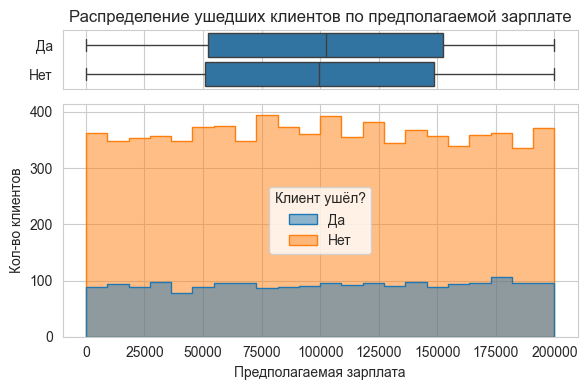

In [146]:
plot_histplot(data=data, column='estimated_salary', column_label='предполагаемая зарплата',
              title='Распределение ушедших клиентов по предполагаемой зарплате',
              xlabel='Предполагаемая зарплата', ylabel='Кол-во клиентов',
              group_by='churn_str', group_label='Клиент ушёл?')

`Вывод:` Ушедшие клиенты в зависимости от предполагаемой зарплаты распределены примерно равномерно.

---
## <a id='toc4_3_'></a>[Продукты и активность](#toc0_)

Изучим как количество используемых продуктов связано с оттоком клиентов:

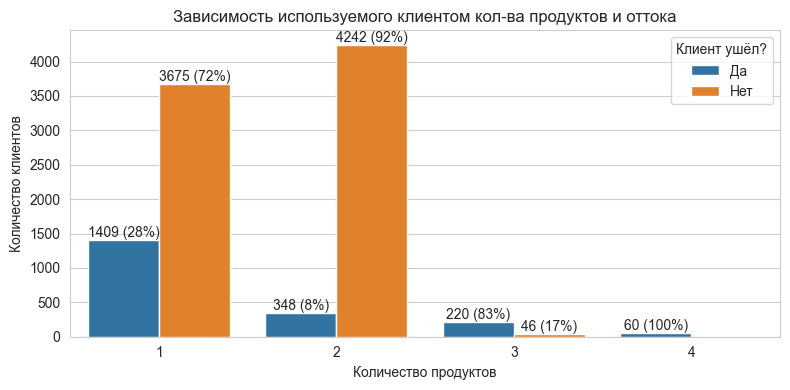

In [147]:
plot_barplot(data=data, column="products_number",
             title="Зависимость используемого клиентом кол-ва продуктов и оттока",
             xlabel="Количество продуктов", figsize=(8, 4))

`Вывод:` Процент ушедших клиентов среди пользующихся кол-вом услуг: 1 услуги - 28%, 2 услуги - 8%, 3 услуги - 83%, 4 услуги - 100% клиентов ушли. Необходимо срочно принять меры и разобраться почему клиенты с большим количеством используемых услуг уходят значительно чаще. Может совокупная стоимость владения 3-4 услугами высока относительно получаемой клиентом ценности?

Изучим как использование кредитной карты связано с оттоком клиентов:

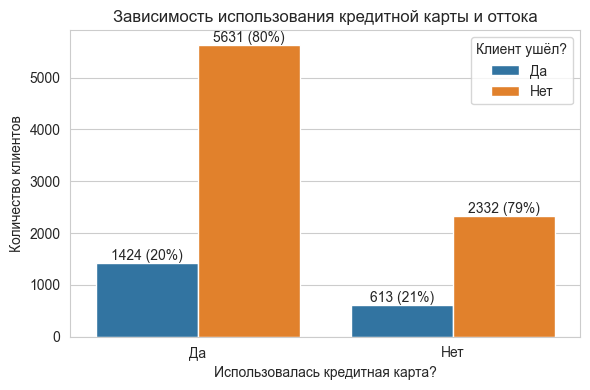

In [148]:
plot_barplot(data=data, column="credit_card_str",
             title="Зависимость использования кредитной карты и оттока",
             xlabel="Использовалась кредитная карта?")

`Вывод:` Процент ушедших клиентов среди пользующихся и не пользующихся кредитной картой примерно равен 20%.

Изучим как активность клиента связана с оттоком клиентов:

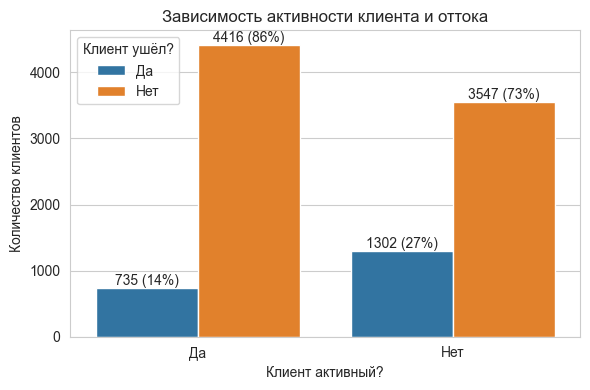

In [149]:
plot_barplot(data=data, column="active_member_str",
             title="Зависимость активности клиента и оттока",
             xlabel="Клиент активный?")

`Вывод:` Процент ушедших клиентов среди активных равен 14% и среди не активных 27%. Можно сделать вывод, что активность оказывает влияние и более активные клиенты уходят реже. Необходимо разработать ряд мер, направленных на увеличение активности клиентов.

---
## <a id='toc4_4_'></a>[Демография и поведение](#toc0_)

Изучим как возраст клиентов связан с их оттоком:

Квартили 'возраст' по оттоку клиентов:
           0.25  0.50  0.75
churn_str                  
Да           38    45    51
Нет          31    36    41


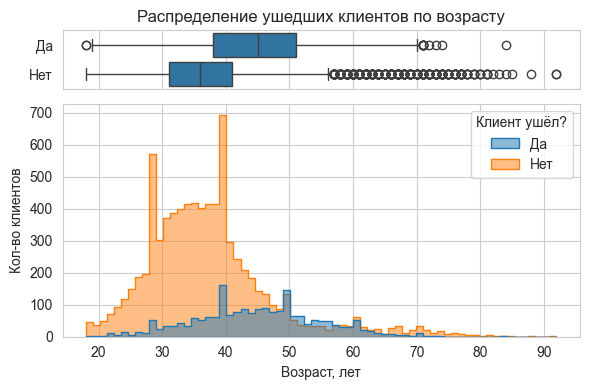

In [150]:
plot_histplot(data=data, column='age', column_label='возраст',
              title='Распределение ушедших клиентов по возрасту',
              xlabel='Возраст, лет', ylabel='Кол-во клиентов',
              group_by='churn_str', group_label='Клиент ушёл?')

`Вывод:` Медианный возраст действующих клиентов 36 и ушедших 45 лет. 50% клиентов по возрасту распределено среди действующих в диапазоне 31-41 год, и среди ушедших в диапазоне 38-51 год. В среднем клиенты более высокого возраста уходят от сотрудничества с банком. Возможно стоит разработать меры по привлечению и удержанию клиентов по старше.

Изучим как срок сотрудничества с банком связан с оттоком:

Квартили 'срок сотрудничества' по оттоку клиентов:
           0.25  0.50  0.75
churn_str                  
Да            2     5     8
Нет           3     5     7


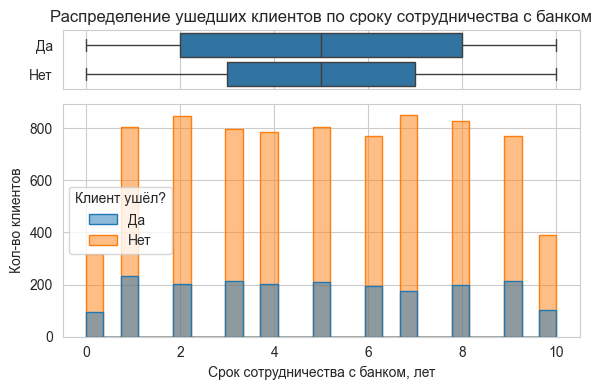

In [151]:
plot_histplot(data=data, column='tenure', column_label='срок сотрудничества',
              title='Распределение ушедших клиентов по сроку сотрудничества с банком',
              xlabel='Срок сотрудничества с банком, лет', ylabel='Кол-во клиентов',
              group_by='churn_str', group_label='Клиент ушёл?')

`Вывод:` Клиенты уходят на разном сроке сотрудничества с банком примерно в одинаковом проценте случаев.

---
## <a id='toc4_5_'></a>[Корреляции и взаимодействия](#toc0_)

Изучим как страна клиента связана с оттоком клиентов:

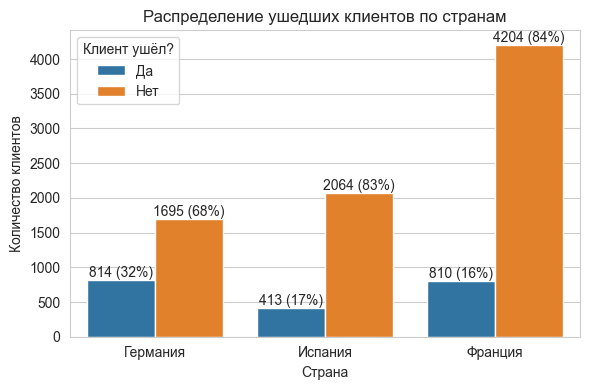

In [152]:
plot_barplot(data=data, column="country_str",
             title="Распределение ушедших клиентов по странам",
             xlabel="Страна")

`Вывод:` Процент ушедших клиентов составил для Франции 16%, для Германии 32% и для Испании 17%. Необходимо выяснить почему процент ушедших клиентов в Германии значительно выше.

Построим матрицу корреляций признаков с полем оттока и на основе построим тепловую карту:

In [153]:
# Выбор только числовых столбцов
numeric_df = data.select_dtypes(include=['number'])

# Расчет корреляции
correlation = numeric_df.corr()

# Корреляция с целевой переменной 'churn'
churn_corr = correlation['churn'].sort_values(ascending=False)

# Накладываем на поле тепловую карту для наглядности
data_styled = highlight_heatmap(data=churn_corr, col_heatmap=['churn', ])

print("Корреляция числовых признаков с оттоком клиентов:")
data_styled

Корреляция числовых признаков с оттоком клиентов:


,churn
churn,1.00
age,0.29
balance,0.12
estimated_salary,0.01
customer_id,-0.01
credit_card,-0.01
tenure,-0.01
credit_score,-0.03
products_number,-0.05
active_member,-0.16


`Вывод:` анализ корреляции числовых признаков показал следующее: признак "возраст" имеет низкую корреляцию 0.285 и признак "баланс на счёте" ещё ниже 0.119. Остальные признаки имеют также не значительные корреляции и уходящие в отрицательные. Можно выделить значение с наибольшей отрицательной корреляцией поля "активность пользователя" равную -0.156.

В итоге можно сделать следующие выводы:
1. с увеличением возраста клиенты немного более склонны к оттоку.
2. более активные клиенты чаще остаются с банком, что предсказуемо.

---
## <a id='toc4_6_'></a>[Корреляция сложных признаков с оттоком клиентов](#toc0_)

### <a id='toc4_6_1_'></a>[Отношение возраста клиента к его балансу на счёте](#toc0_)

Изучим данную связь и для этого создадим поле "age_balance_ratio" с данным новым признаком. Возраст делим на баланс на счёте.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены молодые клиенты и с большими суммами на счету, а справа клиенты в возрасте и с меньшими суммами на счету. Слева на право возраст увеличивается, а баланс на счёте уменьшается.

Коэффициент корреляции: -0.07


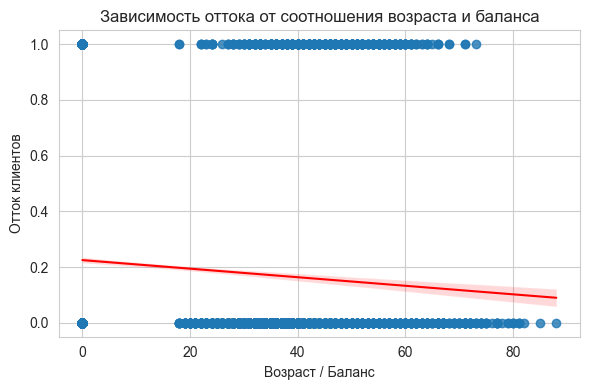

In [154]:
data['age_balance_ratio'] = data['age'] / (data['balance'] + 1)  # +1 для избежания деления на 0

# Расчёт корреляции
x_column = "age_balance_ratio"
y_column = "churn"
correlation = data[[x_column, y_column]].corr().iloc[0, 1]
print(f"Коэффициент корреляции: {correlation:.2f}")

# Строим график
fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(x=data[x_column], y=data[y_column],
    line_kws={"color": "red", "linewidth": 1.5}, ax=ax)

plt.title("Зависимость оттока от соотношения возраста и баланса")
plt.xlabel("Возраст / Баланс")
plt.ylabel("Отток клиентов")
plt.tight_layout()

`Вывод:` С ростом отношения "Возраст / Баланс" отток клиентов снижается. Корреляция -0.07. Анализ говорит о том, что клиенты с большим возрастом и меньшим балансом реже уходят из банка и более лояльны.

Клиенты с маленьким балансом и/или старшие клиенты более лояльны. Они реже уходят из банка, возможно, потому что:
- У них меньше альтернатив для перехода в другие банки.
- Они менее склонны к риску и предпочитают оставаться в привычном банке.
- Их баланс настолько мал, что они не видят смысла менять банк.

Клиенты с большим балансом и/или молодые клиенты чаще уходят. Это может быть связано с тем, что:
- У них больше финансовых возможностей и они активнее ищут выгодные условия в других банках.
- Они более мобильны и открыты к изменениям.
- Их большой баланс делает их привлекательными для других банков, которые предлагают более выгодные условия.

### <a id='toc4_6_2_'></a>[Отношение возраста клиента к сроку сотрудничества с банком](#toc0_)

Изучим данную связь и для этого создадим поле "age_tenure_ratio" с данным новым признаком. Возраст делим на срок сотрудничества клиента с банком.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты, которые начали сотрудничать с банком в молодом, а справа в более зрелом возрасте.

Коэффициент корреляции: 0.11


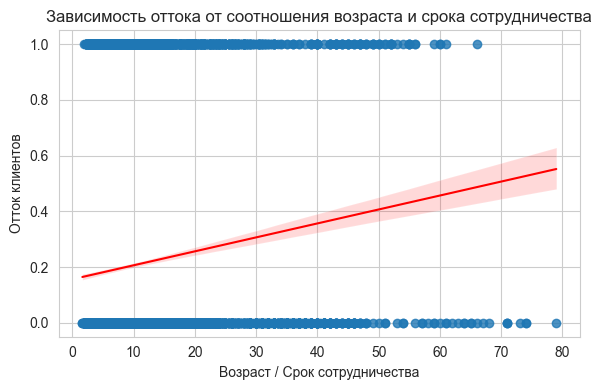

In [155]:
data['age_tenure_ratio'] = data['age'] / (data['tenure'] + 1)  # +1 для избежания деления на 0

# Расчёт корреляции
x_column = "age_tenure_ratio"
y_column = "churn"
correlation = data[[x_column, y_column]].corr().iloc[0, 1]
print(f"Коэффициент корреляции: {correlation:.2f}")

# Строим график
fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(x=data[x_column], y=data[y_column],
    line_kws={"color": "red", "linewidth": 1.5}, ax=ax)

plt.title("Зависимость оттока от соотношения возраста и срока сотрудничества")
plt.xlabel("Возраст / Срок сотрудничества")
plt.ylabel("Отток клиентов")
plt.tight_layout()

`Вывод:` С ростом отношения "Возраст / Срок сотрудничества" отток клиентов повышается. Корреляция 0.11. Анализ говорит о том, что клиенты, которые начали сотрудничать с банком в более раннем возрасте меньше уходят от сотрудничества с банком, чем те, кто пришёл в банк в более зрелом возрасте.

### <a id='toc4_6_3_'></a>[Отношение баланса на счёте к предполагаемой зарплате](#toc0_)

Изучим данную связь и для этого создадим поле "balance_estimated_salary_ratio" с данным новым признаком. Баланс на счёте делим на предполагаемый размер зарплаты.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты, которые тратят большую часть своих доходов и/или хранят деньги в других местах. Справа на оси расположены клиенты, которые хранят большую часть своих доходов на счёте.

Коэффициент корреляции: 0.03


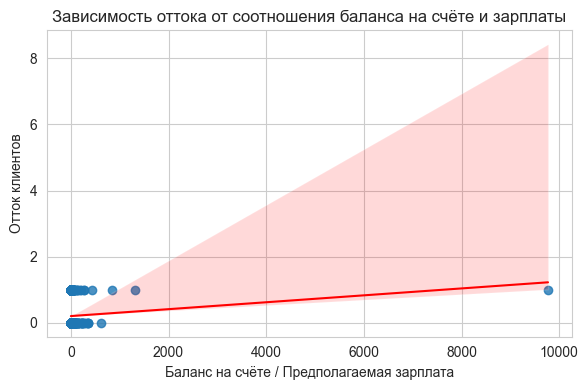

In [156]:
data['balance_estimated_salary_ratio'] = data['balance'] / (data['estimated_salary'] + 1)  # +1 для избежания деления на 0

# Расчёт корреляции
x_column = "balance_estimated_salary_ratio"
y_column = "churn"
correlation = data[[x_column, y_column]].corr().iloc[0, 1]
print(f"Коэффициент корреляции: {correlation:.2f}")

# Строим график
fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(x=data[x_column], y=data[y_column],
    line_kws={"color": "red", "linewidth": 1.5}, ax=ax)

plt.title("Зависимость оттока от соотношения баланса на счёте и зарплаты")
plt.xlabel("Баланс на счёте / Предполагаемая зарплата")
plt.ylabel("Отток клиентов")
plt.tight_layout()

`Вывод:` С ростом отношения "Баланс на счёте / Предполагаемая зарплата" отток клиентов повышается. Корреляция 0.03. Анализ говорит о том, что клиенты, которые тратят большую часть своей зарплаты уходят реже, а те, кто большую часть своей зарплаты хранит на счёте уходят чаще.

### <a id='toc4_6_4_'></a>[Отношение кредитного рейтинга к балансу на счете](#toc0_)

Изучим данную связь и для этого создадим поле "credit_score_balance_ratio" с данным новым признаком. Кредитный рейтинг делим на баланс на счёте.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты с низким кредитным рейтингом и большим балансом, а справа высоким кредитным рейтингом и меньшим балансом. Слева на право кредитный рейтинг увеличивается, а баланс на счёте снижается.

Коэффициент корреляции: -0.12


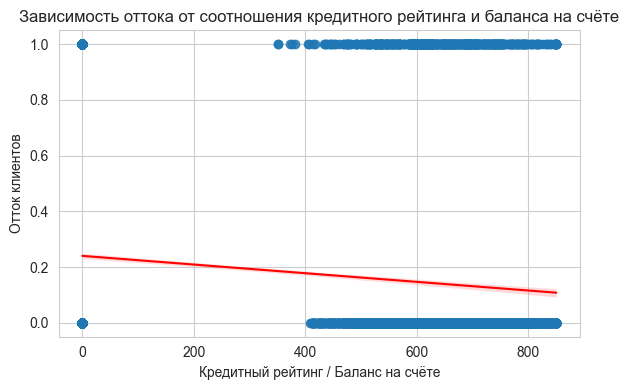

In [157]:
data['credit_score_balance_ratio'] = data['credit_score'] / (data['balance'] + 1)  # +1 для избежания деления на 0

# Расчёт корреляции
x_column = "credit_score_balance_ratio"
y_column = "churn"
correlation = data[[x_column, y_column]].corr().iloc[0, 1]
print(f"Коэффициент корреляции: {correlation:.2f}")

# Строим график
fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(x=data[x_column], y=data[y_column],
    line_kws={"color": "red", "linewidth": 1.5}, ax=ax)

plt.title("Зависимость оттока от соотношения кредитного рейтинга и баланса на счёте")
plt.xlabel("Кредитный рейтинг / Баланс на счёте")
plt.ylabel("Отток клиентов")
plt.tight_layout()

`Вывод:` С ростом отношения "Кредитный рейтинг / Баланс на счёте" отток клиентов снижается. Корреляция -0.12. Анализ говорит о том, что клиенты с высоким балансом и низким кредитным рейтингом уходят чаще, а те, у кого высокий кредитный рейтинг и низкий баланс уходят реже.

### <a id='toc4_6_5_'></a>[Отношение предполагаемой зарплаты к возрасту клиента](#toc0_)

Изучим данную связь и для этого создадим поле "estimated_salary_age_ratio" с данным новым признаком. Предполагаемую зарплату делим на возраст клиента.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты с низкой зарплатой относительно их возраста, а справа с высокой зарплатой относительно их возраста. Слева на право зарплата увеличивается, а возраст снижается.

Коэффициент корреляции: -0.10


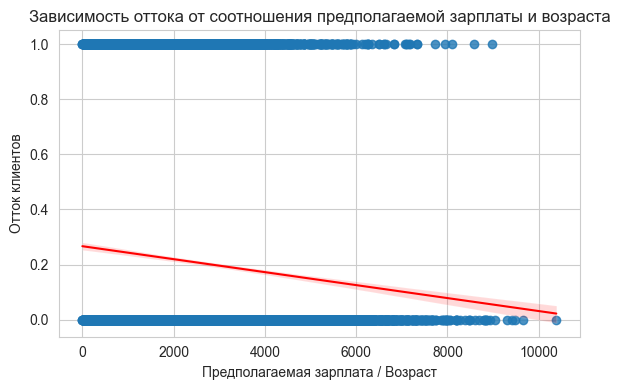

In [158]:
data['estimated_salary_age_ratio'] = data['estimated_salary'] / (data['age'] + 1)  # +1 для избежания деления на 0

# Расчёт корреляции
x_column = "estimated_salary_age_ratio"
y_column = "churn"
correlation = data[[x_column, y_column]].corr().iloc[0, 1]
print(f"Коэффициент корреляции: {correlation:.2f}")

# Строим график
fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(x=data[x_column], y=data[y_column],
    line_kws={"color": "red", "linewidth": 1.5}, ax=ax)

plt.title("Зависимость оттока от соотношения предполагаемой зарплаты и возраста")
plt.xlabel("Предполагаемая зарплата / Возраст")
plt.ylabel("Отток клиентов")
plt.tight_layout()

`Вывод:` С ростом отношения "Предполагаемая зарплата / Возраст" отток клиентов снижается. Корреляция -0.10. Анализ говорит о том, что клиенты с низкой зарплатой относительно их возраста уходят чаще, а клиенты с высокой зарплатой относительно их возраста реже.

### <a id='toc4_6_6_'></a>[Отношение кредитного рейтинга к предполагаемой зарплате](#toc0_)

Изучим данную связь и для этого создадим поле "credit_score_estimated_salary_ratio" с данным новым признаком. Кредитный рейтинг делим на предполагаемую зарплату.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты с низким рейтингом и высокой зарплатой, а справа с высоким рейтингом и низкой зарплатой. Слева на право рейтинг увеличивается, а зарплата снижается.

Коэффициент корреляции: 0.02


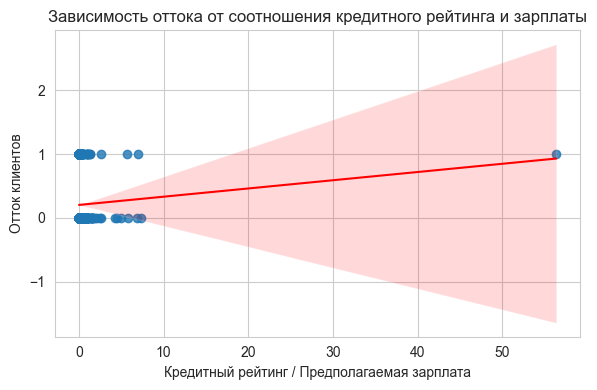

In [159]:
data['credit_score_estimated_salary_ratio'] = data['credit_score'] / (data['estimated_salary'] + 1)  # +1 для избежания деления на 0

# Расчёт корреляции
x_column = "credit_score_estimated_salary_ratio"
y_column = "churn"
correlation = data[[x_column, y_column]].corr().iloc[0, 1]
print(f"Коэффициент корреляции: {correlation:.2f}")

# Строим график
fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(x=data[x_column], y=data[y_column],
    line_kws={"color": "red", "linewidth": 1.5}, ax=ax)

plt.title("Зависимость оттока от соотношения кредитного рейтинга и зарплаты")
plt.xlabel("Кредитный рейтинг / Предполагаемая зарплата")
plt.ylabel("Отток клиентов")
plt.tight_layout()

`Вывод:` С ростом отношения "Кредитный рейтинг / Предполагаемая зарплата" отток клиентов повышается. Корреляция 0.02. Анализ говорит о том, что клиенты с низким кредитным рейтингом и высокой зарплатой уходят реже, а клиенты с высоким кредитным рейтингом и низкой зарплатой чаще.

---
# <a id='toc5_'></a>[Вывод](#toc0_)

`Предобработка данных` В процессе предобработки данных и для удобства дальнейшего анализа созданы одноимённые поля, в которых преобразованы значения:
- для полей credit_card, active_member, churn значения 1 заменены на "да" и значения 0 на "нет".
- для поля gender заменены значения: "Male" на "Мужчины" и "Female" на "Женщины".
- для поля country заменены значения: 'France': 'Франция', 'Germany': 'Германия', 'Spain': 'Испания'.

---
Распределение клиентов:

`По странам` 50.1% клиентов банка из Франции, 25.1% из Германии и 24.8% из Испании.

`По полу` 54.6% клиентов это мужчины и 45.4% это женщины.

`По возрасту` Медианный возраст клиентов 37 лет и 50% клиентов распределено в возрасте от 32 до 44 лет. Стоит сегментировать клиентов по возрасту и разработать под каждый сегмент своё предложение.

`Соотношение действующих и ушедших клиентов банка` Из 100% клиентов, которые были когда-либо с банком 20.4% перестали пользоваться услугами банка. Значимый процент клиентов перестали пользоваться услугами банков. Необходимо разрабатывать меры по удержанию клиентов.

---
Финансовые показатели. Изучили связь оттока клиентов со следующими финансовыми показателями:

`Баланс на счёте` Баланс на счетах действующих и ушедших клиентов распределен примерно равномерно. Медианный баланс действующих клиентов 92073 и ушедших 109349. В среднем клиенты с большим балансом уходят чаще. Необходимо разработать комплекс мер для удержания более состоятельных клиентов.

`Кредитный рейтинг` Ушедшие клиенты по кредитному рейтингу распределены примерно равномерно. Медианный кредитный рейтинг у действующих клиентов 6653 и у ушедших 646.

`Предполагаемая зарплата` Ушедшие клиенты в зависимости от предполагаемой зарплаты распределены примерно равномерно.

---
Продукты и активность. Изучили связь оттока клиентов со следующими показателями использования продуктов:

`Количество используемых продуктов` Процент ушедших клиентов среди пользующихся кол-вом услуг: 1 услуги - 28%, 2 услуги - 8%, 3 услуги - 83%, 4 услуги - 100% клиентов ушли. Необходимо срочно принять меры и разобраться почему клиенты с большим количеством используемых услуг уходят значительно чаще. Может совокупная стоимость владения 3-4 услугами высока относительно получаемой клиентом ценности?

`Использование кредитной карты` Процент ушедших клиентов среди пользующихся и не пользующихся кредитной картой примерно равен 20%.

`Активность клиента` Процент ушедших клиентов среди активных равен 14% и среди не активных 27%. Можно сделать вывод, что активность оказывает влияние и более активные клиенты уходят реже. Необходимо разработать ряд мер, направленных на увеличение активности клиентов.

---
Демография и поведение. Изучили связь оттока клиентов со следующими показателями демографии и поведения:

`Возраст клиента` Медианный возраст действующих клиентов 36 и ушедших 45 лет. 50% клиентов по возрасту распределено среди действующих в диапазоне 31-41 год, и среди ушедших в диапазоне 38-51 год. В среднем клиенты более высокого возраста уходят от сотрудничества с банком. Возможно стоит разработать меры по привлечению и удержанию клиентов по старше.

`Срок сотрудничества с банком` Клиенты уходят на разном сроке сотрудничества с банком примерно в одинаковом проценте случаев.

---
Корреляции и взаимодействия

Анализ ушедших клиентов по странам показал, что процент ушедших клиентов составил для Франции 16%, для Германии 32% и для Испании 17%. Необходимо выяснить почему процент ушедших клиентов в Германии значительно выше.

---
Корреляция сложных признаков с оттоком клиентов. Изучили связь оттока клиентов со следующими сложными признаками:

`Отношение возраста клиента к его балансу на счёте` С ростом отношения "Возраст / Баланс" отток клиентов снижается. Корреляция -0.07. Анализ говорит о том, что клиенты с большим возрастом и меньшим балансом реже уходят из банка и более лояльны.

`Отношение возраста клиента к сроку сотрудничества с банком` С ростом отношения "Возраст / Срок сотрудничества" отток клиентов повышается. Корреляция 0.11. Анализ говорит о том, что клиенты, которые начали сотрудничать с банком в более раннем возрасте меньше уходят от сотрудничества с банком, чем те, кто пришёл в банк в более зрелом возрасте.

`Отношение баланса на счёте к предполагаемой зарплате` С ростом отношения "Баланс на счёте / Предполагаемая зарплата" отток клиентов повышается. Корреляция 0.03. Анализ говорит о том, что клиенты, которые тратят большую часть своей зарплаты уходят реже, а те, кто большую часть своей зарплаты хранит на счёте уходят чаще.

`Отношение кредитного рейтинга к балансу на счёте` С ростом отношения "Кредитный рейтинг / Баланс на счёте" отток клиентов снижается. Корреляция -0.12. Анализ говорит о том, что клиенты с высоким балансом и низким кредитным рейтингом уходят чаще, а те, у кого высокий кредитный рейтинг и низкий баланс уходят реже.

`Отношение предполагаемой зарплаты к возрасту клиента` С ростом отношения "Предполагаемая зарплата / Возраст" отток клиентов снижается. Корреляция -0.10. Анализ говорит о том, что клиенты с низкой зарплатой относительно их возраста уходят чаще, а клиенты с высокой зарплатой относительно их возраста реже.

`Отношение кредитного рейтинга к предполагаемой зарплате` С ростом отношения "Кредитный рейтинг / Предполагаемая зарплата" отток клиентов повышается. Корреляция 0.02. Анализ говорит о том, что клиенты с низким кредитным рейтингом и высокой зарплатой уходят реже, а клиенты с высоким кредитным рейтингом и низкой зарплатой чаще.